# Scikit-learn and Mlxtend

mlxtend + scikit-learn 이라면 python으로 데이터 분석할 수 있다.

요즘 resemble 방식 중에 stacking이 가장 성능이 뛰어나다.

분석하는 사람들은 통계적으로 하고 싶을 때는 stats model 쓰면 되고,
기계학습 쓸 때는 mlxtend + scikit-learn으로 하면 된다.

feature selection에 관련해서는 scikit-feature라는 library를 통해서 여러가지 feature selection 방법을 적용할 수 있다.

In [4]:
!pip install mlxtend

## Mlxtend
: Mlxtend(machine learning extensions)는 Data Science 업무에서 유용한 툴을 제공해주는 라이브러리이다.  
[Link to Mlxtend UserGuide](https://rasbt.github.io/mlxtend/USER_GUIDE_INDEX/)  
  
### association rule : 보통 rule이 붙으면 data mining  
association rule learning은 어떠한 2개의 아이템 집합이 빈번히 발생하는가를 알려주는 일련의 규칙을 생성하는 방법이다. 
대표적인 예로 마켓에서의 구매에 대한 연관 규칙을 생성하는 것이다.
마켓에는 많은 종류의 상품을 파는데 소비자들이 상품을 구매하는 이력을 이용하여 상품간의 연관관계를 만들고, 관계 있는 상품, 관계 없는 상품 등을 구할 수 있도록 하는데 쓰인다.  

[association rule에 대한 포스트 링크1](http://hackability.kr/entry/Data-Mining-11-%EC%97%B0%EA%B4%80-%EB%B2%95%EC%B9%99-Association-Rule-%EC%86%8C%EA%B0%9C)  
[association rule에 대한 포스트 링크2](https://ratsgo.github.io/machine%20learning/2017/04/08/apriori/)  
  
두 가지 링크 모두 참고하면 된다.


In [4]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
# TransactionEncoder : 파이썬 리스트에서 transaction 데이터를 위한 인코더 클래스이다.
#                      리스트의 리스트 형식의 데이터를 Numpy array로 인코딩해줌.
# apriori : One-hot Dataframe에서 빈번한 itemset을 찾아준다.
#           연관 룰 학습(association rule learning)에서 빈번한 itemset들을 추출해주는 알고리즘.

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
# 이중 리스트 형식.

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
# fit -> dataset내의 unique한 column들을 알아낸다. 
# transform -> dataset을 one-hot 인코딩된 Numpy boolean array로 반환해준다.
# numpy의 ndarray형식으로 인코딩해준다.
df = pd.DataFrame(te_ary, columns=te.columns_)
# dataFrame객체로 반환해준다.
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
# 최소 support가 0.6이상인 item들에 대해서 item들의 열 인덱스들을 리턴해준다.
# 즉 모든 itemset에서 60% 이상 등장하는 단어 셋을 골라주는 것이다.
# use_colnames = True를 통해서 integer 값들을 대표하는 item이름으로 변환해준다.
frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


In [6]:
from mlxtend.frequent_patterns import association_rules
# 빈번한 itemset에서 association rules(연관 룰)을 만드는 함수이다.

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
# 이전에 만든 60%이상의 support를 지니는 itemset들에서
# confidence에 있어서 최소 0.7 이상인 연관룰을 반환

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.000000
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000
8,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
9,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf


In [7]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules
# lift(향상도)가 최소 1.2가 넘는 연관 룰 반환

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
2,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000
3,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.600000
5,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf


 - support(A->C) = support(A+C) [aka 'support'], range: [0, 1]  
  
 - confidence(A->C) = support(A+C) / support(A), range: [0, 1]  
  
 - lift(A->C) = confidence(A->C) / support(C), range: [0, inf]  
  
 - leverage(A->C) = support(A->C) - support(A)*support(C),
    range: [-1, 1]  
  
 - conviction = [1 - support(C)] / [1 - confidence(A->C)],
    range: [0, inf]  

In [10]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules
# antecedents 항목 숫자 만큼 새로이 column을 만들어 추가.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000,1
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,1
2,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000,2
3,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,2
4,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.600000,1
5,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf,1


In [11]:
rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]
# 이렇게 여러 조건에 맞는 연관룰을 찾아 낼 수 있다.(=필터링)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
3,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf,2


In [12]:
rules[rules['antecedents'] == {'Eggs', 'Kidney Beans'}]
# 이것또한 원하는 조건에 맞는 연관룰 반환.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
2,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,2


In [13]:
import pandas as pd

dict = {'itemsets': [['177', '176'], ['177', '179'],
                     ['176', '178'], ['176', '179'],
                     ['93', '100'], ['177', '178'],
                     ['177', '176', '178']],
        'support':[0.253623, 0.253623, 0.217391,
                   0.217391, 0.181159, 0.108696, 0.108696]}

freq_itemsets = pd.DataFrame(dict)
freq_itemsets # itemset과 해당 지지도를 지니는 DataFrame.

,itemsets,support
0,"[177, 176]",0.253623
1,"[177, 179]",0.253623
2,"[176, 178]",0.217391
3,"[176, 179]",0.217391
4,"[93, 100]",0.181159
5,"[177, 178]",0.108696
6,"[177, 176, 178]",0.108696


In [15]:
from mlxtend.frequent_patterns import association_rules

res = association_rules(freq_itemsets, support_only=True, min_threshold=0.1)
res # support_only는 support이외 다른 것들은 계산하지 않도록 해준다.
# 이것은 "cropped(잘린)" DataFrame으로 item의 subset에 대하여 support값을 지니지 않기 때문에
# 이것은 연관 룰을 계산할 때 문제를 야기 할 수 있다.
# 그래서 support_only 플래그는 주어진 rule의 support에 대해서만 계산 하도록 한다.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(177),(176),NaN,NaN,0.253623,NaN,NaN,NaN,NaN
1,(176),(177),NaN,NaN,0.253623,NaN,NaN,NaN,NaN
2,(177),(179),NaN,NaN,0.253623,NaN,NaN,NaN,NaN
3,(179),(177),NaN,NaN,0.253623,NaN,NaN,NaN,NaN
4,(178),(176),NaN,NaN,0.217391,NaN,NaN,NaN,NaN
5,(176),(178),NaN,NaN,0.217391,NaN,NaN,NaN,NaN
6,(179),(176),NaN,NaN,0.217391,NaN,NaN,NaN,NaN
7,(176),(179),NaN,NaN,0.217391,NaN,NaN,NaN,NaN
8,(100),(93),NaN,NaN,0.181159,NaN,NaN,NaN,NaN
9,(93),(100),NaN,NaN,0.181159,NaN,NaN,NaN,NaN


In [16]:
res = res[['antecedents', 'consequents', 'support']]
res # 원하는 데이터만 필터링해서 갖고 온다

,antecedents,consequents,support
0,(177),(176),0.253623
1,(176),(177),0.253623
2,(177),(179),0.253623
3,(179),(177),0.253623
4,(178),(176),0.217391
5,(176),(178),0.217391
6,(179),(176),0.217391
7,(176),(179),0.217391
8,(100),(93),0.181159
9,(93),(100),0.181159


## Stacking Classifier

In [17]:
from sklearn import datasets

iris = datasets.load_iris() # iris 데이터를 갖고 온다.
X, y = iris.data[:, 1:3], iris.target # input값과 target값을 할당.

In [18]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression 
# 갈래상 맨 끝에서 binary classfication을 해줌
from sklearn.neighbors import KNeighborsClassifier # KNN 분류기
from sklearn.naive_bayes import GaussianNB  #나이브 베이즈
from sklearn.ensemble import RandomForestClassifier # resemble로 만든 classifier
# Random Forest : 여러 가지의 decision tree들을 임의적(randomly)으로 학습하는 방식의 resemble방식이다.
from mlxtend.classifier import StackingClassifier
# stacking은 다수의 분류 모델들을 결합한 resemble 학습 방식이다.
import numpy as np

clf1 = KNeighborsClassifier(n_neighbors=1) # KNN 분류기
clf2 = RandomForestClassifier(random_state=1) # Random Forest 분류기
clf3 = GaussianNB() # 나이브 베이즈
lr = LogisticRegression() # 로지스틱회귀
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr) # fitting
# KNN, 나이브베이즈, Random Forest 방식으로 분류된 Prediction들을 meta-classifier인
# 로지스틱 회귀에 넣어서 최종 결과값을 내준다.

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    # 3등분한 cross-validation방식으로 각 모델에 넣어서 accuracy(정확도)를 구해준다.
    
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.91 (+/- 0.06) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [Naive Bayes]
Accuracy: 0.95 (+/- 0.03) [StackingClassifier]


In [24]:
% matplotlib inline

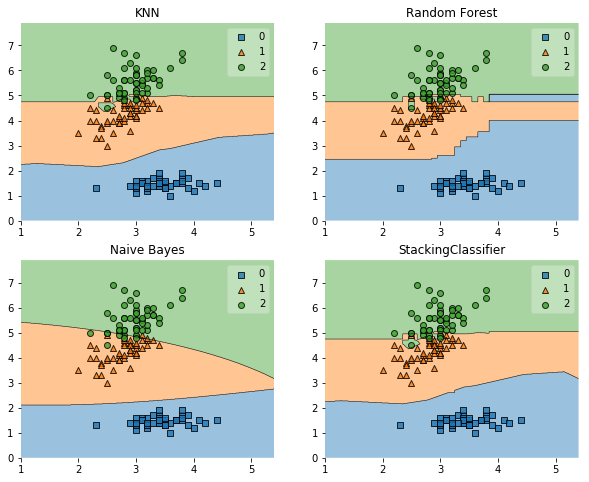

In [25]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
# 1차원이나 2차원으로 분류기의 decision region들을 plotting해주는 함수
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2) # 2,2 크기로 Grid 생성

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)
# 그래프 시각화 해서 보여준다.

kaggle에서 No Free Hunch를 보면 어떤 새로운 기법이나 1등한 사람들의 기법을 공부할 수 있다.

### GridSearchCV
estimator에 최적의 parameter값을 찾을 수 있도록 도와주는 기능이다.

In [26]:
data = iris

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier()

In [29]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [30]:
from sklearn.model_selection import GridSearchCV
# estimator에 parameter값들을 수정해서 검사할 수 있도록 해준다.

In [31]:
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14]}

In [32]:
grid = GridSearchCV(knn, param_grid= param_grid, cv=10) # 10-fold cross-validation
# knn 모델을 cross-validation을 3~14까지 해준다.
# 그래서 가장 성능이 좋은 parameter를 찾기 위함

In [33]:
grid.fit(data.data, data.target) # fitting

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
grid.best_params_ # 가장 성능이 좋았던 parameter
# n이 13일 때 가장 성능이 좋다. KNeighbor에서 k=13일 때

{'n_neighbors': 13}

In [35]:
grid.best_score_ # 가장 높은 스코어
# k=13일 때의 스코어 := 가장 높은 스코어

0.97999999999999998

In [36]:
grid.__dict__
# grid를 dict형식으로 출력해줌.

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acces

{'best_estimator_': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=13, p=2,
            weights='uniform'),
 'best_index_': 10,
 'best_params_': {'n_neighbors': 13},
 'best_score_': 0.97999999999999998,
 'cv': 10,
 'cv_results_': {'mean_fit_time': array([  1.59864426e-03,   9.97638702e-04,   8.97288322e-04,
           7.97605515e-04,   3.98993492e-04,   2.99191475e-04,
           9.97304916e-05,   9.97304916e-05,   3.98993492e-04,
           3.99112701e-04,   3.98826599e-04,   1.99532509e-04]),
  'mean_score_time': array([ 0.00219533,  0.00109663,  0.00847728,  0.00109677,  0.00049884,
          0.00059843,  0.00069804,  0.00069799,  0.00039897,  0.00049815,
          0.00049891,  0.0007021 ]),
  'mean_test_score': array([ 0.96666667,  0.96666667,  0.96666667,  0.96666667,  0.96666667,
          0.96666667,  0.97333333,  0.96666667,  0.96666667,  0.97333333,
          0.98      ,  0.97333333]),
  'mean_trai

In [37]:
dir(grid)

#  'best_estimator_',
#  'best_index_',
#  'best_params_',
#  'best_score_',
#  'cv_results_'

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_is_fitted',
 '_estimator_type',
 '_get_param_iterator',
 '_get_param_names',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'fit_params',
 'get_params',
 'grid_scores_',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'return_train_scor

In [38]:
grid.cv_results_

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acces

{'mean_fit_time': array([  1.59864426e-03,   9.97638702e-04,   8.97288322e-04,
          7.97605515e-04,   3.98993492e-04,   2.99191475e-04,
          9.97304916e-05,   9.97304916e-05,   3.98993492e-04,
          3.99112701e-04,   3.98826599e-04,   1.99532509e-04]),
 'mean_score_time': array([ 0.00219533,  0.00109663,  0.00847728,  0.00109677,  0.00049884,
         0.00059843,  0.00069804,  0.00069799,  0.00039897,  0.00049815,
         0.00049891,  0.0007021 ]),
 'mean_test_score': array([ 0.96666667,  0.96666667,  0.96666667,  0.96666667,  0.96666667,
         0.96666667,  0.97333333,  0.96666667,  0.96666667,  0.97333333,
         0.98      ,  0.97333333]),
 'mean_train_score': array([ 0.96074074,  0.9637037 ,  0.96888889,  0.97259259,  0.97333333,
         0.97925926,  0.97925926,  0.9762963 ,  0.98      ,  0.97851852,
         0.98      ,  0.97925926]),
 'param_n_neighbors': masked_array(data = [3 4 5 6 7 8 9 10 11 12 13 14],
              mask = [False False False False False Fal

stacking cv -> cross validation을 통해 gridsearchcv를 해서 최적의 parameter를 찾아낼 수 있음

GridSearchCV는 꼭 알아야한다!!! 굉장히 중요!!!

In [39]:
grid.score

<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

gridsearchCV안에 stacking, resemble 기법을 적용할 수 있다.